In [4]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import nltk
from nltk.corpus import stopwords

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [5]:
# Run this first everytime Then restart clear and run
# pip install --upgrade tensorflow

In [6]:
df = pd.read_csv('/kaggle/input/section-marked-train/section_marked_train.csv')

In [7]:
df.head(5)

,Unnamed: 0,abstracts_headlines,section_name,label,ordinal_label
0,0,new start treaty nearly wrapped president obam...,1,0,none_to_slight
1,1,response plea israel release jonathan pollard ...,1,0,none_to_slight
2,2,letters editor regarding tensions new york med...,1,0,none_to_slight
3,3,canada beat united states semifinals world jun...,0,0,none_to_slight
4,4,kristine lilly holds world record internationa...,0,0,none_to_slight


In [8]:
df = df.drop(columns='Unnamed: 0')

In [9]:
df

,abstracts_headlines,section_name,label,ordinal_label
0,new start treaty nearly wrapped president obam...,1,0,none_to_slight
1,response plea israel release jonathan pollard ...,1,0,none_to_slight
2,letters editor regarding tensions new york med...,1,0,none_to_slight
3,canada beat united states semifinals world jun...,0,0,none_to_slight
4,kristine lilly holds world record internationa...,0,0,none_to_slight
...,...,...,...,...
20403,job market remained strong last month suggesti...,0,0,none_to_slight
20404,recent poll data suggests rising prices domina...,0,0,none_to_slight
20405,scientists keeping eye ba one three geneticall...,0,0,none_to_slight
20406,twenty one republican state attorneys general ...,0,0,none_to_slight


In [10]:
# Remove Stopwords and create two lists containing sms' and labels
articles = []
labels = []

for index, row in df.iterrows():
  labels.append(row['section_name'])

  token_list = [x for x in row['abstracts_headlines'].split() if x not in stopwords.words('english')]

  articles.append(" ".join(token_list))

### Train Test Split and Modeling

In [11]:
X_train, X_test, y_train, y_test = train_test_split(articles, labels, random_state=42, test_size=0.2,
                                                    stratify = labels)

In [12]:
print(len(X_train), len(X_test))

16326 4082


In [31]:
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)
# vocab_size = len(tokenizer.word_index) + 1
# max_length = max(len(seq.split()) for seq in X_train)
# embedding_dim = 100  # You may adjust this based on experimentation

# sequences = tokenizer.texts_to_sequences(X_train)
# padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
# print(vocab_size)
# print(embedding_dim)
# print(max_length)

In [ ]:
'''
23081
100
77
'''

In [13]:
# Define variables

 # Max number of words
 # Word Vector dimension
 # Max length of the sequence
 # Where to chop off the seq
 # Where to put padding
 # Define some variables
vocab_size = 23100 # max number of words equiv of max_features for vectorizers
embedding_dim = 100 # this is the dimension of the Word Vector
max_length = 78 # maximum length of the sequence
trunc_type = 'post' # where to cut off
padding_type = 'post' # where to put the padding
oov_token = '<OOV>'

'''
print(vocab_size)
print(embedding_dim)
print(max_length)
23081
100
77
'''

'\nprint(vocab_size)\nprint(embedding_dim)\nprint(max_length)\n23081\n100\n77\n'

In [14]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_token)

In [15]:
tokenizer.fit_on_texts(X_train)

In [16]:
tokenizer.word_index;

In [17]:
train_seq = tokenizer.texts_to_sequences(X_train)

In [18]:
X_train[10]

'see latest charts maps coronavirus cases deaths hospitalizations butler county alabama butler county alabama covid case risk tracker'

In [19]:
print(train_seq[10])

[3, 15, 19, 5, 10, 14, 17, 18, 4054, 4, 324, 4054, 4, 324, 12, 13, 16, 20]


In [20]:
len(train_seq[10])

18

In [21]:
len(train_seq[25])

10

### Padding

In [22]:
train_padded = pad_sequences(train_seq, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [23]:
train_padded[10]

array([   3,   15,   19,    5,   10,   14,   17,   18, 4054,    4,  324,
       4054,    4,  324,   12,   13,   16,   20,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [24]:
test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_seq, maxlen = max_length, padding = padding_type, truncating = trunc_type)

### Encode labels

In [25]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [26]:
y_train[:15]

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [27]:
le.classes_

array([0, 1])

In [28]:
le.inverse_transform([0, 0, 0, 0, 1, 0, 0])

array([0, 0, 0, 0, 1, 0, 0])

In [29]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [30]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

### Modeling

In [33]:
model = Sequential()

# Adding an Embedding layer with default initializer
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))  # Adding a dropout layer with a dropout rate of 0.5
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))  # Adding another dropout layer
model.add(Dense(2, activation='sigmoid'))

# Displaying the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 78, 100)           2310000   
                                                                 
 bidirectional (Bidirection  (None, 78, 128)           84480     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 78, 128)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 1

In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [35]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_padded, y_train,
    validation_data=(test_padded, y_test),
    batch_size=256,
    epochs=100,  # You can increase the number of epochs
    verbose='auto',
    callbacks=[early_stopping]  # Adding the early stopping callback
)

Epoch 1/100


I0000 00:00:1709238027.728974     162 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


64/64 [==============================] - 21s 193ms/step - loss: 0.4523 - acc: 0.7937 - val_loss: 0.2535 - val_acc: 0.8981
Epoch 2/100
64/64 [==============================] - 9s 147ms/step - loss: 0.1944 - acc: 0.9329 - val_loss: 0.2458 - val_acc: 0.9023
Epoch 3/100
64/64 [==============================] - 7s 113ms/step - loss: 0.1034 - acc: 0.9693 - val_loss: 0.2689 - val_acc: 0.9045
Epoch 4/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0576 - acc: 0.9853 - val_loss: 0.3755 - val_acc: 0.8846
Epoch 5/100
64/64 [==============================] - 5s 82ms/step - loss: 0.0275 - acc: 0.9944 - val_loss: 0.4862 - val_acc: 0.8920


# Evaluate our model

In [36]:
pred = np.argmax(model.predict(test_padded), axis =1)

128/128 [==============================] - 2s 7ms/step


In [37]:
pred

array([0, 0, 0, ..., 1, 0, 1])

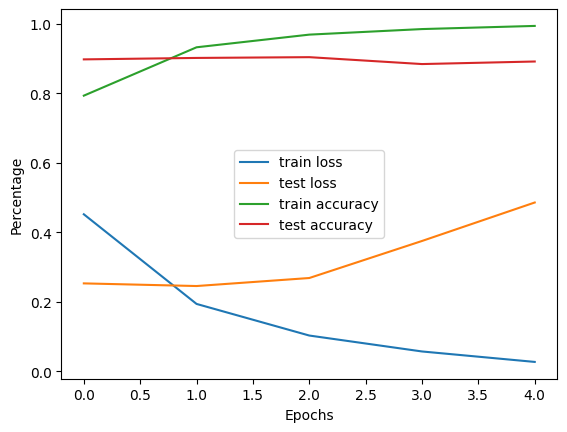

In [38]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.legend()
plt.show;

### Develop Further With Model 2

In [39]:
model_2 = Sequential()

# Adding an Embedding layer with default initializer
model_2.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_2.add(Bidirectional(LSTM(128, return_sequences=True)))  # Increased LSTM units
model_2.add(Dropout(0.6))  # Adjusted dropout rate
model_2.add(Bidirectional(LSTM(64)))  # Another layer with increased units
model_2.add(Dropout(0.4))  # Adjusted dropout rate
model_2.add(Dense(2, activation='sigmoid'))

# Displaying the model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 78, 100)           2310000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 78, 256)           234496    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 78, 256)           0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                

In [40]:

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


In [41]:
# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_2 = model_2.fit(
    train_padded, y_train,
    validation_data=(test_padded, y_test),
    batch_size=256,
    epochs=100,
    verbose='auto',
    callbacks=[early_stopping]
)

Epoch 1/100
64/64 [==============================] - 16s 155ms/step - loss: 0.3988 - acc: 0.8180 - val_loss: 0.2619 - val_acc: 0.8831
Epoch 2/100
64/64 [==============================] - 8s 122ms/step - loss: 0.1630 - acc: 0.9419 - val_loss: 0.2426 - val_acc: 0.8993
Epoch 3/100
64/64 [==============================] - 4s 69ms/step - loss: 0.0718 - acc: 0.9787 - val_loss: 0.3592 - val_acc: 0.8858
Epoch 4/100
64/64 [==============================] - 5s 74ms/step - loss: 0.0344 - acc: 0.9909 - val_loss: 0.3769 - val_acc: 0.8934
Epoch 5/100
64/64 [==============================] - 4s 67ms/step - loss: 0.0216 - acc: 0.9942 - val_loss: 0.5040 - val_acc: 0.8795
Epoch 6/100
64/64 [==============================] - 5s 73ms/step - loss: 0.0133 - acc: 0.9965 - val_loss: 0.5154 - val_acc: 0.8800
Epoch 7/100
64/64 [==============================] - 4s 61ms/step - loss: 0.0103 - acc: 0.9976 - val_loss: 0.5783 - val_acc: 0.8836


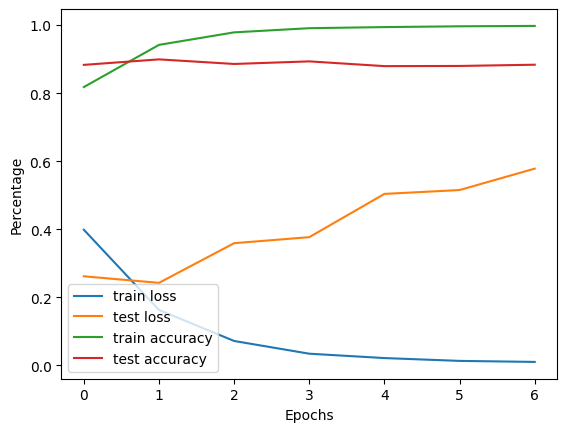

In [42]:
plt.plot(history_2.history['loss'], label='train loss')
plt.plot(history_2.history['val_loss'], label='test loss')
plt.plot(history_2.history['acc'], label='train accuracy')
plt.plot(history_2.history['val_acc'], label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.legend()
plt.show;

In [43]:
model_3 = Sequential()
# Adding an Embedding layer with default initializer
model_3.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_3.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))))  # L2 regularization
model_3.add(Dropout(0.5))  # Adjusted dropout rate
model_3.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.01))))  # L2 regularization
model_3.add(Dropout(0.3))  # Adjusted dropout rate
model_3.add(Dense(2, activation='sigmoid'))

# Displaying the model summary
model_3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 78, 100)           2310000   
                                                                 
 bidirectional_4 (Bidirecti  (None, 78, 256)           234496    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 78, 256)           0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                

In [44]:
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [45]:
# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_3 = model_3.fit(
    train_padded, y_train,
    validation_data=(test_padded, y_test),
    batch_size=256,
    epochs=100,
    verbose='auto',
    callbacks=[early_stopping]
)

Epoch 1/100
64/64 [==============================] - 16s 144ms/step - loss: 4.1041 - acc: 0.8001 - val_loss: 1.2201 - val_acc: 0.8910
Epoch 2/100
64/64 [==============================] - 6s 89ms/step - loss: 0.5610 - acc: 0.9239 - val_loss: 0.3208 - val_acc: 0.9037
Epoch 3/100
64/64 [==============================] - 6s 92ms/step - loss: 0.1432 - acc: 0.9645 - val_loss: 0.3094 - val_acc: 0.8900
Epoch 4/100
64/64 [==============================] - 4s 67ms/step - loss: 0.2575 - acc: 0.9100 - val_loss: 0.5609 - val_acc: 0.7467
Epoch 5/100
64/64 [==============================] - 5s 78ms/step - loss: 0.4456 - acc: 0.7903 - val_loss: 0.5515 - val_acc: 0.7981
Epoch 6/100
64/64 [==============================] - 4s 67ms/step - loss: 0.5202 - acc: 0.8279 - val_loss: 0.4834 - val_acc: 0.8655
Epoch 7/100
64/64 [==============================] - 3s 49ms/step - loss: 0.2259 - acc: 0.9623 - val_loss: 0.4348 - val_acc: 0.8805
Epoch 8/100
64/64 [==============================] - 4s 59ms/step - loss: 

In [46]:
model_4 = Sequential()

# Adding an Embedding layer with default initializer
model_4.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_4.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))))  # L2 regularization
model_4.add(Dropout(0.5))  # Adjusted dropout rate
model_4.add(Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=l2(0.01))))  # Another Bidirectional LSTM layer
model_4.add(Dropout(0.3))  # Adjusted dropout rate
model_4.add(Bidirectional(LSTM(32, kernel_regularizer=l2(0.01))))  # Additional Bidirectional LSTM layer
model_4.add(Dropout(0.2))  # Adjusted dropout rate
model_4.add(Dense(2, activation='sigmoid'))

# Displaying the model summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 78, 100)           2310000   
                                                                 
 bidirectional_6 (Bidirecti  (None, 78, 256)           234496    
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 78, 256)           0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 78, 128)           164352    
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 78, 128)           0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 64)               

In [47]:
model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])


In [48]:
# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_4 = model_4.fit(
    train_padded, y_train,
    validation_data=(test_padded, y_test),
    batch_size=256,
    epochs=10,  # Set a smaller number of epochs
    verbose='auto',
    callbacks=[early_stopping]
)

Epoch 1/10
64/64 [==============================] - 19s 163ms/step - loss: 5.5730 - acc: 0.7871 - val_loss: 1.9023 - val_acc: 0.8819
Epoch 2/10
64/64 [==============================] - 6s 100ms/step - loss: 0.9396 - acc: 0.9191 - val_loss: 0.4882 - val_acc: 0.8956
Epoch 3/10
64/64 [==============================] - 5s 85ms/step - loss: 0.2540 - acc: 0.9583 - val_loss: 0.3938 - val_acc: 0.8885
Epoch 4/10
64/64 [==============================] - 5s 75ms/step - loss: 0.1349 - acc: 0.9745 - val_loss: 0.4601 - val_acc: 0.8775
Epoch 5/10
64/64 [==============================] - 5s 80ms/step - loss: 0.1025 - acc: 0.9800 - val_loss: 0.5348 - val_acc: 0.8707
Epoch 6/10
64/64 [==============================] - 4s 67ms/step - loss: 0.0745 - acc: 0.9870 - val_loss: 0.4876 - val_acc: 0.8770


In [49]:
model_6 = Sequential()

# Adding an Embedding layer with default initializer
model_6.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_6.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))))  # L2 regularization
model_6.add(Dropout(0.6))  # Increased dropout rate
model_6.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.01))))  # Bidirectional LSTM layer
model_6.add(Dropout(0.5))  # Increased dropout rate
model_6.add(Dense(2, activation='sigmoid'))

# Displaying the model summary
model_6.summary()

model_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_6 = model_6.fit(
    train_padded, y_train,
    validation_data=(test_padded, y_test),
    batch_size=256,
    epochs=10,  # Set a smaller number of epochs
    verbose='auto',
    callbacks=[early_stopping]
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 78, 100)           2310000   
                                                                 
 bidirectional_9 (Bidirecti  (None, 78, 256)           234496    
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 78, 256)           0         
                                                                 
 bidirectional_10 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                

In [50]:
model_7 = Sequential()

model_7.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_7.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))))
model_7.add(Dropout(0.5))  # Dropout for the first layer
model_7.add(BatchNormalization())  # Batch Normalization for stabilization
model_7.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.01))))
model_7.add(Dropout(0.3))  # Dropout for the second layer
model_7.add(BatchNormalization())  # Batch Normalization for stabilization
model_7.add(Dense(2, activation='sigmoid'))

# Displaying the model summary
model_7.summary()

# Using the Adam optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.0015)

model_7.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 78, 100)           2310000   
                                                                 
 bidirectional_11 (Bidirect  (None, 78, 256)           234496    
 ional)                                                          
                                                                 
 dropout_11 (Dropout)        (None, 78, 256)           0         
                                                                 
 batch_normalization (Batch  (None, 78, 256)           1024      
 Normalization)                                                  
                                                                 
 bidirectional_12 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                      

In [51]:
# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history_7 = model_7.fit(
    train_padded, y_train,
    validation_data=(test_padded, y_test),
    batch_size=256,
    epochs=100,
    verbose='auto',
    callbacks=[early_stopping]
)

Epoch 1/100
64/64 [==============================] - 17s 144ms/step - loss: 3.4399 - acc: 0.8513 - val_loss: 1.0755 - val_acc: 0.7915
Epoch 2/100
64/64 [==============================] - 6s 95ms/step - loss: 0.3384 - acc: 0.9574 - val_loss: 0.5942 - val_acc: 0.7467
Epoch 3/100
64/64 [==============================] - 6s 87ms/step - loss: 0.0930 - acc: 0.9863 - val_loss: 0.5612 - val_acc: 0.7467
Epoch 4/100
64/64 [==============================] - 5s 74ms/step - loss: 0.0403 - acc: 0.9947 - val_loss: 0.5255 - val_acc: 0.7469
Epoch 5/100
64/64 [==============================] - 4s 64ms/step - loss: 0.0293 - acc: 0.9945 - val_loss: 0.3199 - val_acc: 0.8626
Epoch 6/100
64/64 [==============================] - 4s 59ms/step - loss: 0.0290 - acc: 0.9947 - val_loss: 0.5775 - val_acc: 0.7594
Epoch 7/100
64/64 [==============================] - 4s 58ms/step - loss: 0.0185 - acc: 0.9981 - val_loss: 0.5063 - val_acc: 0.7886
Epoch 8/100
64/64 [==============================] - 3s 51ms/step - loss: 

In [52]:
model_8 = Sequential()

# Adding an Embedding layer with default initializer
model_8.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

# First Bidirectional LSTM layer
model_8.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))))
model_8.add(Dropout(0.5))  # Dropout for the first layer
model_8.add(BatchNormalization())  # Batch Normalization for stabilization

# Second Bidirectional LSTM layer
model_8.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.01))))
model_8.add(Dropout(0.3))  # Dropout for the second layer
model_8.add(BatchNormalization())  # Batch Normalization for stabilization

# Output layer
model_8.add(Dense(2, activation='sigmoid'))

# Displaying the model summary
model_8.summary()

# Using the RMSprop optimizer with a custom learning rate
optimizer = RMSprop(learning_rate=0.02)

model_8.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['acc'])

# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history_8 = model_8.fit(
    train_padded, y_train,
    validation_data=(test_padded, y_test),
    batch_size=256,
    epochs=100,
    verbose='auto',
    callbacks=[early_stopping]
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 78, 100)           2310000   
                                                                 
 bidirectional_13 (Bidirect  (None, 78, 256)           234496    
 ional)                                                          
                                                                 
 dropout_13 (Dropout)        (None, 78, 256)           0         
                                                                 
 batch_normalization_2 (Bat  (None, 78, 256)           1024      
 chNormalization)                                                
                                                                 
 bidirectional_14 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                      

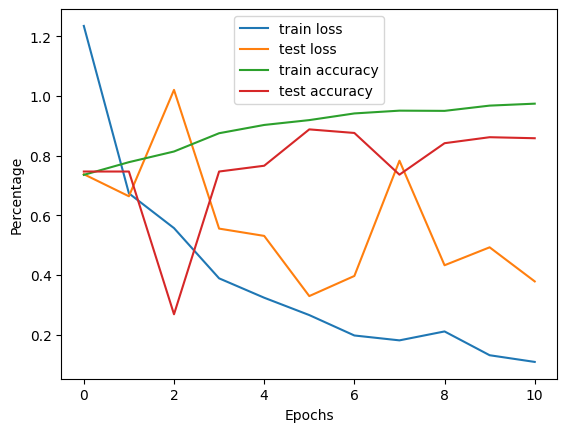

In [53]:
plt.plot(history_8.history['loss'], label='train loss')
plt.plot(history_8.history['val_loss'], label='test loss')
plt.plot(history_8.history['acc'], label='train accuracy')
plt.plot(history_8.history['val_acc'], label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Percentage')
plt.legend()
plt.show;

In [57]:
model_9 = Sequential()

# Adding an Embedding layer with default initializer
model_9.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model_9.add(Bidirectional(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01))))  # L2 regularization
model_9.add(Dropout(0.6))  # Increased dropout rate
model_9.add(Bidirectional(LSTM(64, kernel_regularizer=l2(0.01))))  # Bidirectional LSTM layer
model_9.add(Dropout(0.5))  # Increased dropout rate
model_9.add(Dense(2, activation='sigmoid'))

# Displaying the model summary
model_9.summary()

model_9.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Adding early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_9 = model_9.fit(
    train_padded, y_train,
    validation_data=(test_padded, y_test),
    batch_size=512,
    epochs=20,  # Set a smaller number of epochs
    verbose='auto',
    callbacks=[early_stopping]
)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 78, 100)           2310000   
                                                                 
 bidirectional_21 (Bidirect  (None, 78, 256)           234496    
 ional)                                                          
                                                                 
 dropout_21 (Dropout)        (None, 78, 256)           0         
                                                                 
 bidirectional_22 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 2)               

### Best accuracy $95 \%$ Train $90 \%$ Test
### Lowest Loss $\sim0.28$ Train $\sim0.36$ Test